In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight = 0.7
bias = 0.5

start = 0
end = 1
step = 0.02

torch.manual_seed(42)

# input
X = torch.arange(start, end, step).unsqueeze(dim=1)
# output
y = weight *X*X + bias # y = w * x^2 + b

In [3]:
print(f"Total input set = {len(X)}")
print(f"Total output set = {len(y)}")

# spliting data
train_split = int (0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"train set length for x = {len(X_train)} and y = {len(y_train)}")
print(f"test set length for x = {len(X_test)} and y = {len(y_test)}")

Total input set = 50
Total output set = 50
train set length for x = 40 and y = 40
test set length for x = 10 and y = 10


In [4]:
# plot data
def plot_pred(train_data = X_train,
              train_y = y_train,
              test_data = X_test,
              test_y = y_test,
              preds = None):
    
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_y, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_y, c='g', s=15, label="Testing data")
    
    if preds != None:
        plt.scatter(test_data, preds, c='r', s=15, label="Testing data")
    
    plt.legend(prop={"size":14});

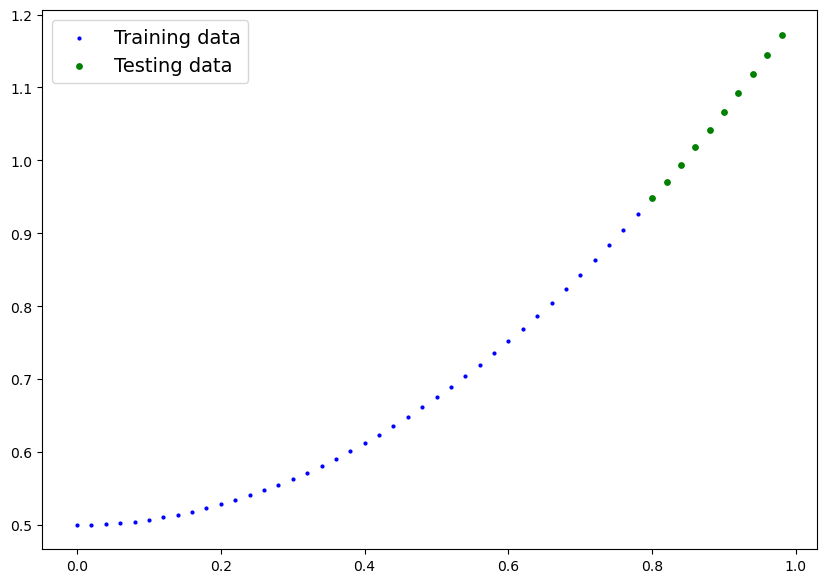

In [5]:
plot_pred()

In [6]:

class parabola(nn.Module):
    def __init__(self):
        super().__init__()
        # for quadratic functions
        self.linear = nn.Linear(2, 1)  # One for x, one for x^2
        
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        x_squared = X ** 2
        features = torch.cat([X, x_squared], dim=1)
        return self.linear(features)

In [7]:
model_1 = parabola()

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.5406, 0.5869]])),
             ('linear.bias', tensor([-0.1657]))])

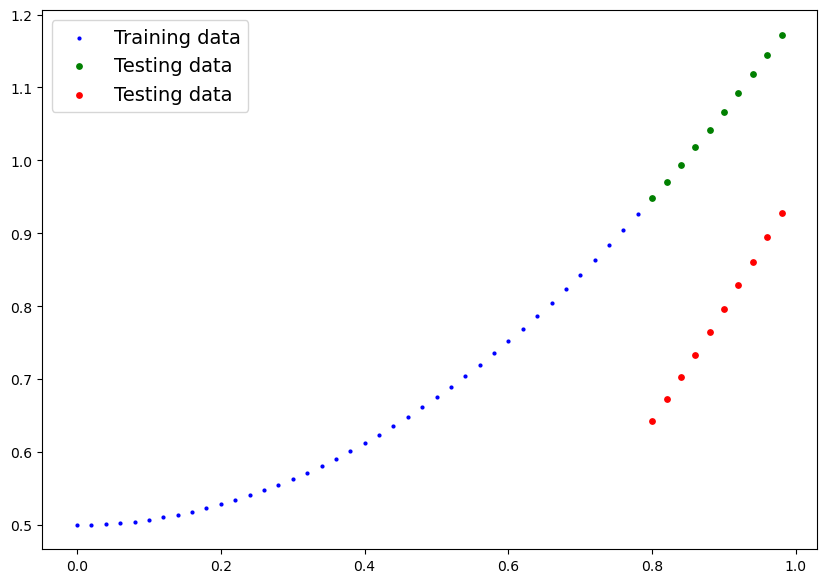

In [8]:
with torch.inference_mode():
    y_pred = model_1(X_test)
    
plot_pred(preds=y_pred)

In [9]:
EPOCHS = 1000
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(EPOCHS):
    # train loop
    model_1.train()
    
    y_pred = model_1(X_train)
    
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    # test loop
    model_1.eval()
    
    with torch.inference_mode():
        y_preds = model_1(X_test)
        
        test_loss = loss_fn(y_preds, y_test.type(torch.float))
        
    if epoch % 50 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy()) # To be able to plot them make them numpy arrays
            test_loss_values.append(test_loss.detach().numpy()) # To be able to plot them make them numpy arrays
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.23946690559387207 | MAE Test Loss: 0.06838510185480118 
Epoch: 50 | MAE Train Loss: 0.04010050743818283 | MAE Test Loss: 0.014979608356952667 
Epoch: 100 | MAE Train Loss: 0.020281264558434486 | MAE Test Loss: 0.04650280997157097 
Epoch: 150 | MAE Train Loss: 0.016344156116247177 | MAE Test Loss: 0.0516543984413147 
Epoch: 200 | MAE Train Loss: 0.014080074615776539 | MAE Test Loss: 0.04657813534140587 
Epoch: 250 | MAE Train Loss: 0.012219260446727276 | MAE Test Loss: 0.03944481164216995 
Epoch: 300 | MAE Train Loss: 0.010617105290293694 | MAE Test Loss: 0.032642804086208344 
Epoch: 350 | MAE Train Loss: 0.00923098810017109 | MAE Test Loss: 0.026709919795393944 
Epoch: 400 | MAE Train Loss: 0.008031194098293781 | MAE Test Loss: 0.021678747609257698 
Epoch: 450 | MAE Train Loss: 0.00699260737746954 | MAE Test Loss: 0.01745978742837906 
Epoch: 500 | MAE Train Loss: 0.006093552801758051 | MAE Test Loss: 0.013944534584879875 
Epoch: 550 | MAE Train Loss: 0.0053

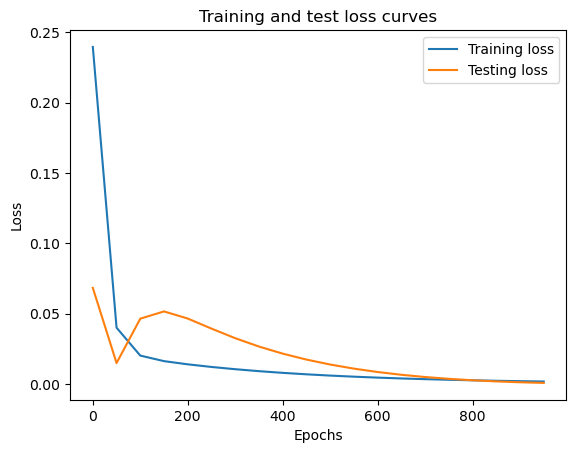

In [10]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Training loss")
plt.plot(epoch_count, test_loss_values, label="Testing loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

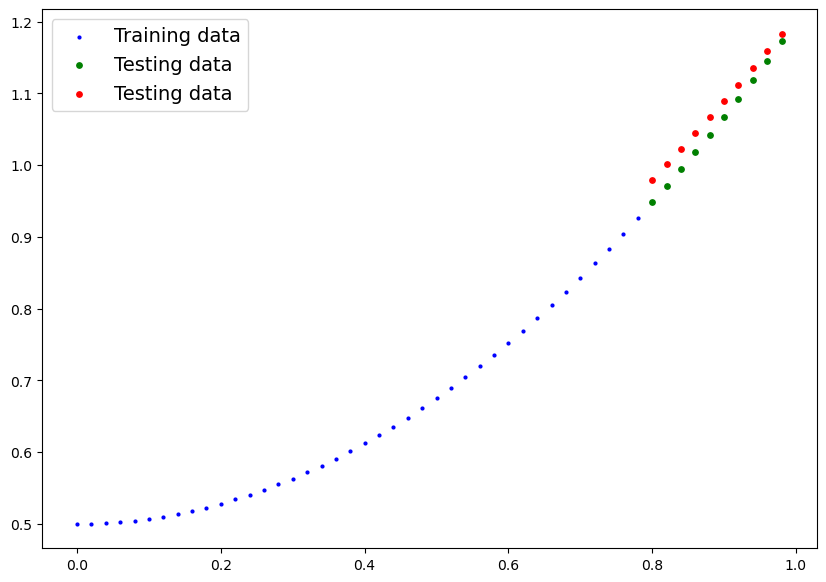

In [11]:
with torch.inference_mode():
    y_preds = model_1(X_test)
    
plot_pred(preds=y_preds)